In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# Intro

In the following case study, I want to do a multiple regression to predict the profit of start-ups (dependent variable) based on the independent variables:
- R&D Spend
- Administration
- Marketing Spend

# Data cleaning

In [96]:
file='/Users/alexandergandji/Desktop/Course_Folder/Case Study/Regression/start_up/50_Startups.csv'
df=pd.read_csv(file)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [98]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

We do not have any null values so we can move on to the exploratory analysis.

# Exploratory Analysis

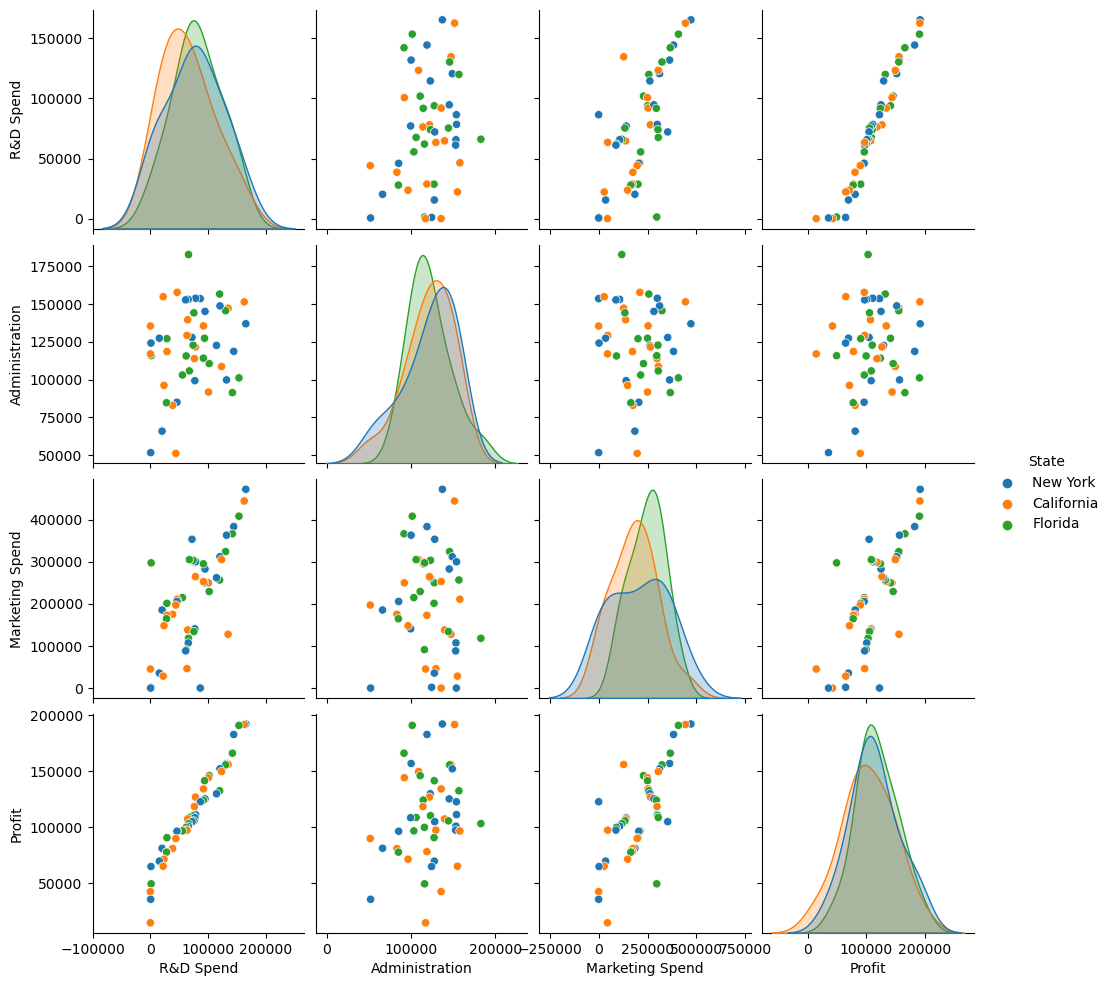

In [99]:
sns.pairplot(df, hue='State')

Here we get an idea of how the independent variables interact with each other and the dependent variable.

We will, later on, check the regression assumptions, and now we will get an idea of how the different variables behave in the various states.

New York      17
California    17
Florida       16
Name: State, dtype: int64


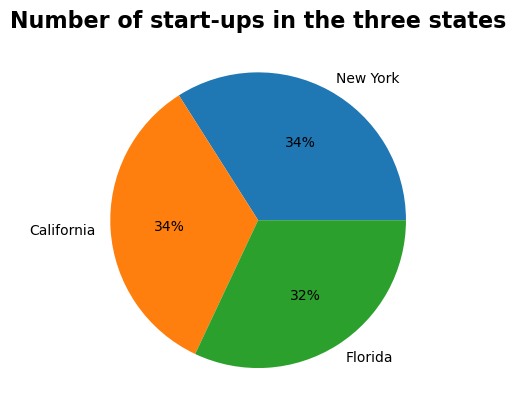

In [100]:
#Number of start-ups in the three states
df.State.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.ylabel('')
plt.title('Number of start-ups in the three states', size=16, fontweight='bold')
print(df.State.value_counts())

The data set almost contains an equal amount of start-ups out of the three states.

State
New York      1933859.59
Florida       1900384.39
California    1766387.98
Name: Profit, dtype: float64


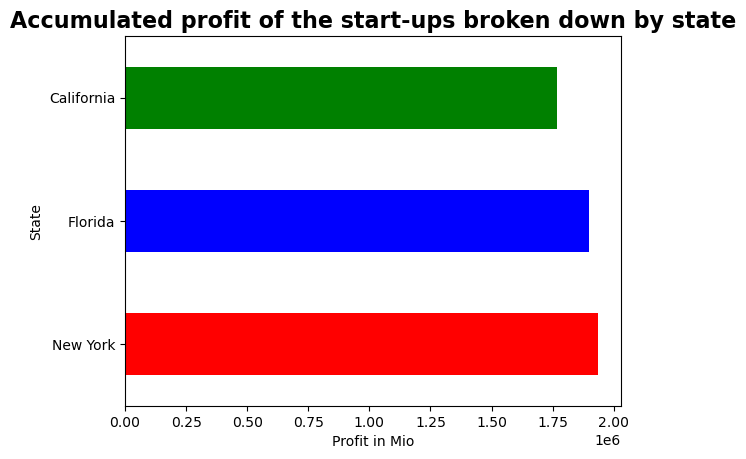

In [101]:
#Accumulated profit of the start-ups broken down by state
df.groupby('State')['Profit'].sum().sort_values(ascending=False).plot(kind='barh', color=['red', 'blue', 'green'])
plt.xlabel('Profit in Mio')
plt.title('Accumulated profit of the start-ups broken down by state', size=16, fontweight='bold')
print(df.groupby('State')['Profit'].sum().sort_values(ascending=False))

State
New York      2066239.00
California    2052690.62
Florida       1948302.36
Name: Administration, dtype: float64


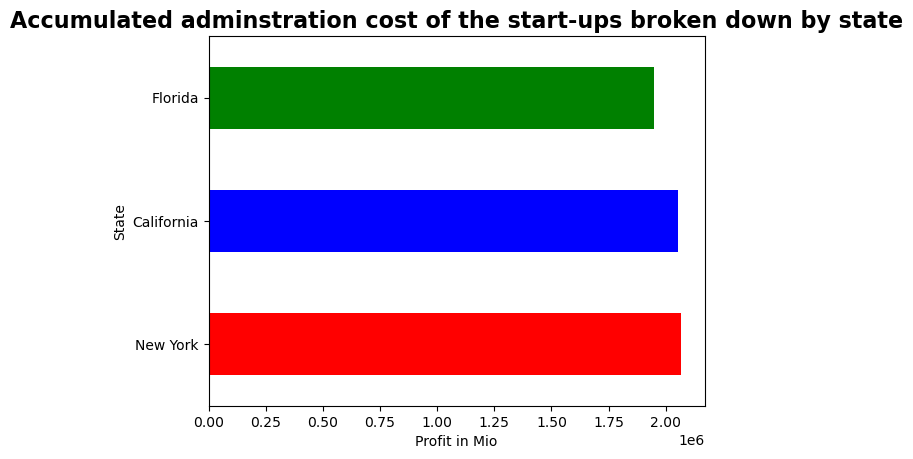

In [102]:
#Accumulated adminstration cost of the start-ups broken down by state
df.groupby('State')['Administration'].sum().sort_values(ascending=False).plot(kind='barh', color=['red', 'blue', 'green'])
plt.xlabel('Profit in Mio')
plt.title('Accumulated adminstration cost of the start-ups broken down by state', size=16, fontweight='bold')
print(df.groupby('State')['Administration'].sum().sort_values(ascending=False))

State
New York      1295316.06
Florida       1291584.26
California    1099180.46
Name: R&D Spend, dtype: float64


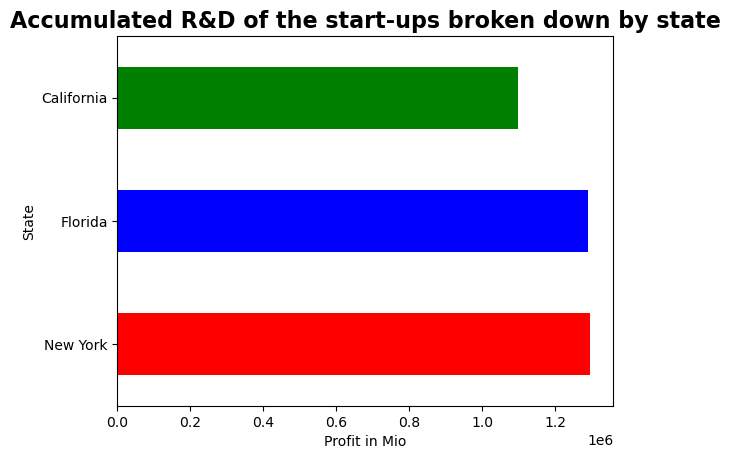

In [103]:
#Accumulated R&D of the start-ups broken down by state
df.groupby('State')['R&D Spend'].sum().sort_values(ascending=False).plot(kind='barh', color=['red', 'blue', 'green'])
plt.xlabel('Profit in Mio')
plt.title('Accumulated R&D of the start-ups broken down by state', size=16, fontweight='bold')
print(df.groupby('State')['R&D Spend'].sum().sort_values(ascending=False))

State
Florida       3957176.82
New York      3490882.27
California    3103195.80
Name: Marketing Spend, dtype: float64


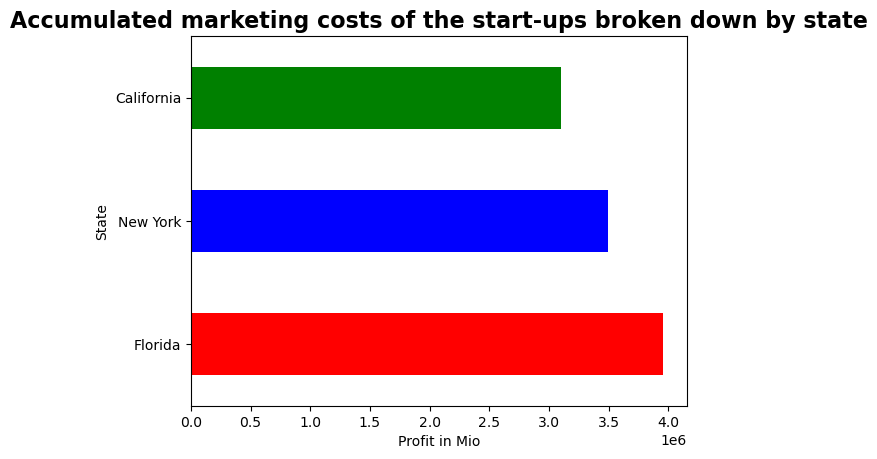

In [104]:
#Accumulated marketing costs of the start-ups broken down by state
df.groupby('State')['Marketing Spend'].sum().sort_values(ascending=False).plot(kind='barh', color=['red', 'blue', 'green'])
plt.title('Accumulated marketing costs of the start-ups broken down by state', size=16, fontweight='bold')
plt.xlabel('Profit in Mio')
print(df.groupby('State')['Marketing Spend'].sum().sort_values(ascending=False))

What we can see is that the most "Profit" is generated in New York, the same for the "Administration" and "R&D" spent. Only in Florida they spent the most on "Marketing".

Next, we move to the analysis.

# Multiple Regression
## Chcking the assumptions
### Linear Relationship between the dependent and independent variable

<AxesSubplot:xlabel='Marketing Spend', ylabel='Profit'>

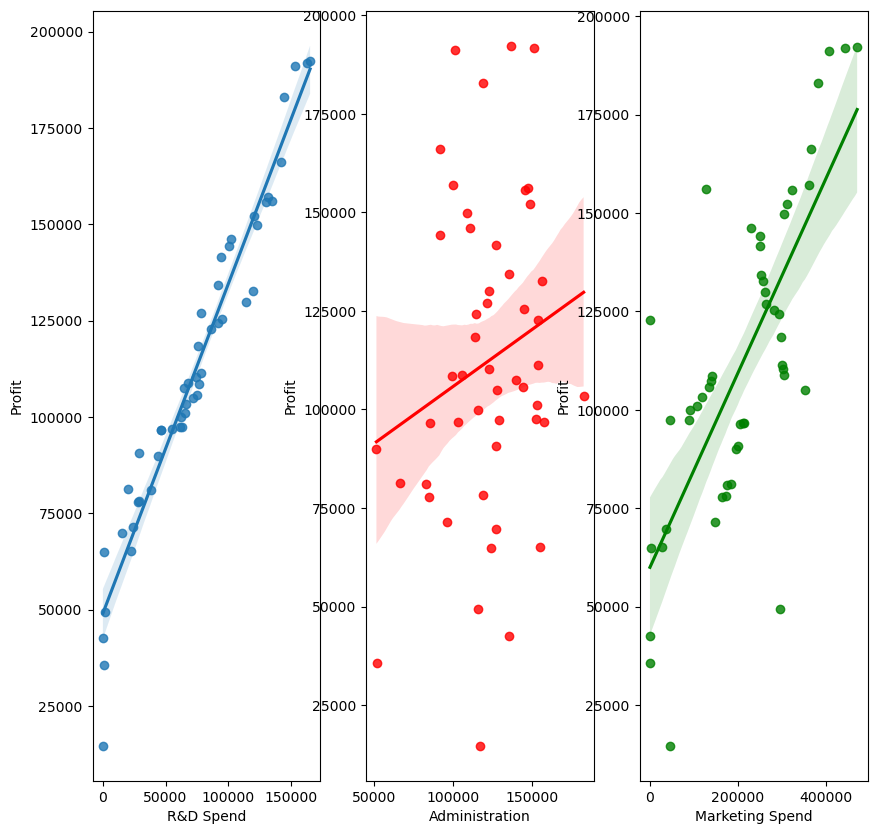

In [105]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
sns.regplot(df['R&D Spend'], df.Profit)

plt.subplot(1,3,2)
sns.regplot(df.Administration, df.Profit, color='red')

plt.subplot(1,3,3)
sns.regplot(df['Marketing Spend'], df.Profit, color='green')

As we can see "R&D Spend" and "Marketing Spend" do have linear relationship with profit, for "Administration" it is not that clear but it does not have a non-linear relationship. So we can say that this assumption is accurate.

### Normality of Residuals

In [106]:
df=df.rename(columns={'R&D Spend':'rAd', 'Administration':'admin', 'Marketing Spend':'marketing', 'Profit':'profit'})
df.head()

,rAd,admin,marketing,State,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


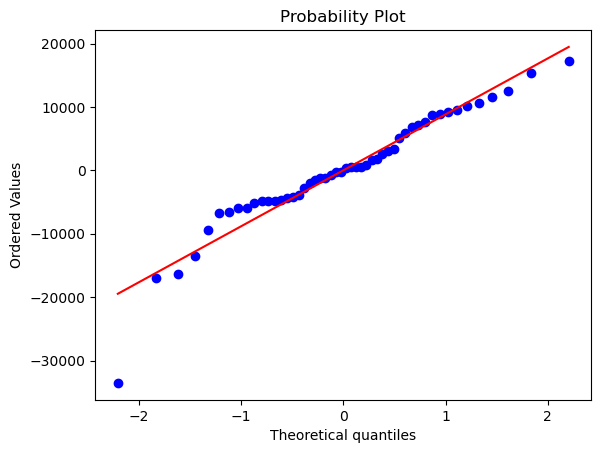

In [107]:
model=sm.OLS.from_formula('profit ~ rAd + admin + marketing', data=df)
result=model.fit()
residuals=result.resid
stats.probplot(residuals, dist='norm', plot=plt)
plt.show()

In [108]:
from scipy.stats import kstest
kstest(residuals, 'norm', stats.norm.fit(residuals))

KstestResult(statistic=0.12547455116583947, pvalue=0.37902925715892044)

We can see that that the residuals are normally distributed.

### Checking for homoscedasticity

Text(0, 0.5, 'Residuals')

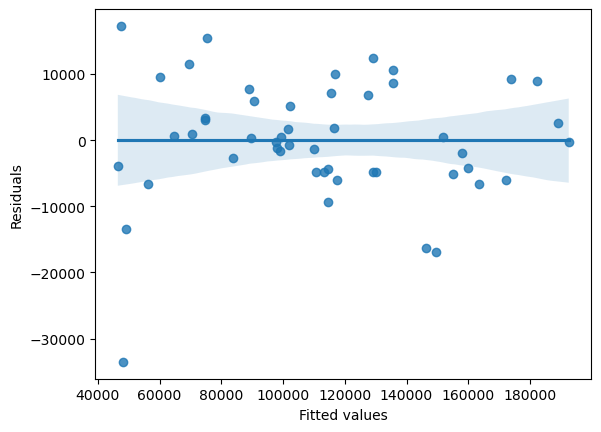

In [109]:
sns.regplot(result.fittedvalues, result.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

In [110]:
#Goldfeld Quandt Test
from statsmodels.compat import lzip
sm.stats.diagnostic.het_goldfeldquandt(result.resid, result.model.exog, drop=0.2)

(2.272065581465464, 0.08069107341043717, 'increasing')

The p-value of the Goldfeld Quandt Test is not smaller than 0.05, therefore we do not deal with heteroscedasticity and can assume homoscedasticity.

### No or little Multicollinarity

<AxesSubplot:>

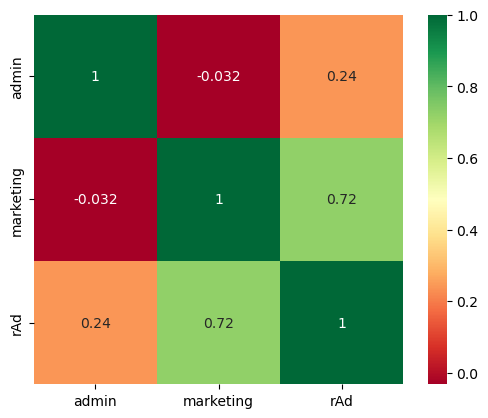

In [111]:
ind_var=df[['admin', 'marketing', 'rAd']]
sns.heatmap(ind_var.corr(), annot=True, cmap='RdYlGn', square=True)

As we can see, there is a strong correlation between "rAd" and "marketing", indicating we have to eliminate one of them.

In [112]:
model=sm.OLS.from_formula('profit ~ rAd + admin', data=df)
result=model.fit(cov_type='HC1')
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     264.0
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           2.77e-26
Time:                        14:15:54   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.489e+04   6202.905      8.849      0.000    4.27e+04     6.7e+04
rAd            0.8621      0.038     22.928      0.000       0.788       0.936
admin         -0.0530      0.044     -1.196      0.232      -0.140       0.034
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
model=sm.OLS.from_formula('profit ~ admin + marketing', data=df)
result=model.fit(cov_type='HC1')
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     55.69
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           3.99e-13
Time:                        14:15:54   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.04e+04      1.937      0.053    -240.921    4.07e+04
admin          0.3237      0.090      3.591      0.000       0.147       0.500
marketing      0.2488      0.032      7.881      0.000       0.187       0.311
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on the accuracy level R-squared=> we have to say we have to get rid of the "marketing" variable.

All assumptions are fulfilled and we can start with the analysis.

# Multiple Regression

In [114]:
model=sm.OLS.from_formula('profit ~ rAd + admin', data=df)
result=model.fit(cov_type='HC1')
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     264.0
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           2.77e-26
Time:                        14:15:54   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.489e+04   6202.905      8.849      0.000    4.27e+04     6.7e+04
rAd            0.8621      0.038     22.928      0.000       0.788       0.936
admin         -0.0530      0.044     -1.196      0.232      -0.140       0.034
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
result.params

Intercept    54886.620628
rAd              0.862118
admin           -0.052995
dtype: float64

In [116]:
def income_func(rad, admin):
    z=54886.620628+(0.862118*rad)+(-0.052995*admin)
    return(z)

In [117]:
income_func(120542.52, 148718.95)

150927.13613011

In [118]:
df.head(10)

,rAd,admin,marketing,State,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


As we can see, our prediction comes close to the profit of row 8. But, we need to remind ourselves that "admin" did have a relatively high correlation with "rAd" (0.24) and in our model above admin's p-value was 0.232. This means the variable does not contribute to explaining the dependent variable profit.

Based on that insight, I will remove the variable admin as well.

<AxesSubplot:>

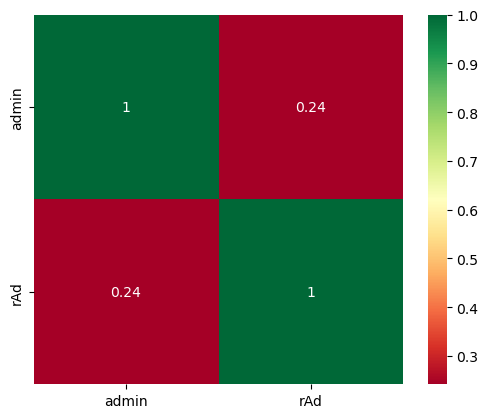

In [119]:
ind_var=df[['admin', 'rAd']]
sns.heatmap(ind_var.corr(), annot=True, cmap='RdYlGn', square=True)

# Moving from a Multiple Linear Regression to a Linear Regression

In [120]:
model=sm.OLS.from_formula('profit ~ rAd', data=df)
result=model.fit(cov_type='HC1')
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     534.0
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           1.17e-27
Time:                        14:15:54   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   3447.374     14.223      0.000    4.23e+04    5.58e+04
rAd            0.8543      0.037     23.108      0.000       0.782       0.927
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
result.params

Intercept    49032.899141
rAd              0.854291
dtype: float64

In [122]:
def income_func1(rad):
    z=49032.899141+(rad*0.854291)
    return(z)

In [123]:
income_func1(120542.52)

152011.28909432

In [124]:
print('Model with admin: ', income_func(120542.52, 148718.95))
print('Model without admin: ', income_func1(120542.52))

Model with admin:  150927.13613011
Model without admin:  152011.28909432


In [125]:
df.head(10)

,rAd,admin,marketing,State,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


As we can see, the new model did lose only 0.1% in accuracy, but the outcome is more accurate. We can predict the profit of start-ups (keeping in mind that we have a sample size of 50) with a 94.5% accuracy.

Ockham's razor method also supports the approach of removing "admin" as well. This method says you should always use the easiest/simplest approach to explain or predict values/outcomes. In this case, it was to cut the model down to one independent variable.